# Data recommendation

## Import

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr

In [2]:
data = pd.read_csv('../KaDo.csv')

## Data exploration

<AxesSubplot:xlabel='PRIX_NET', ylabel='MOIS_VENTE'>

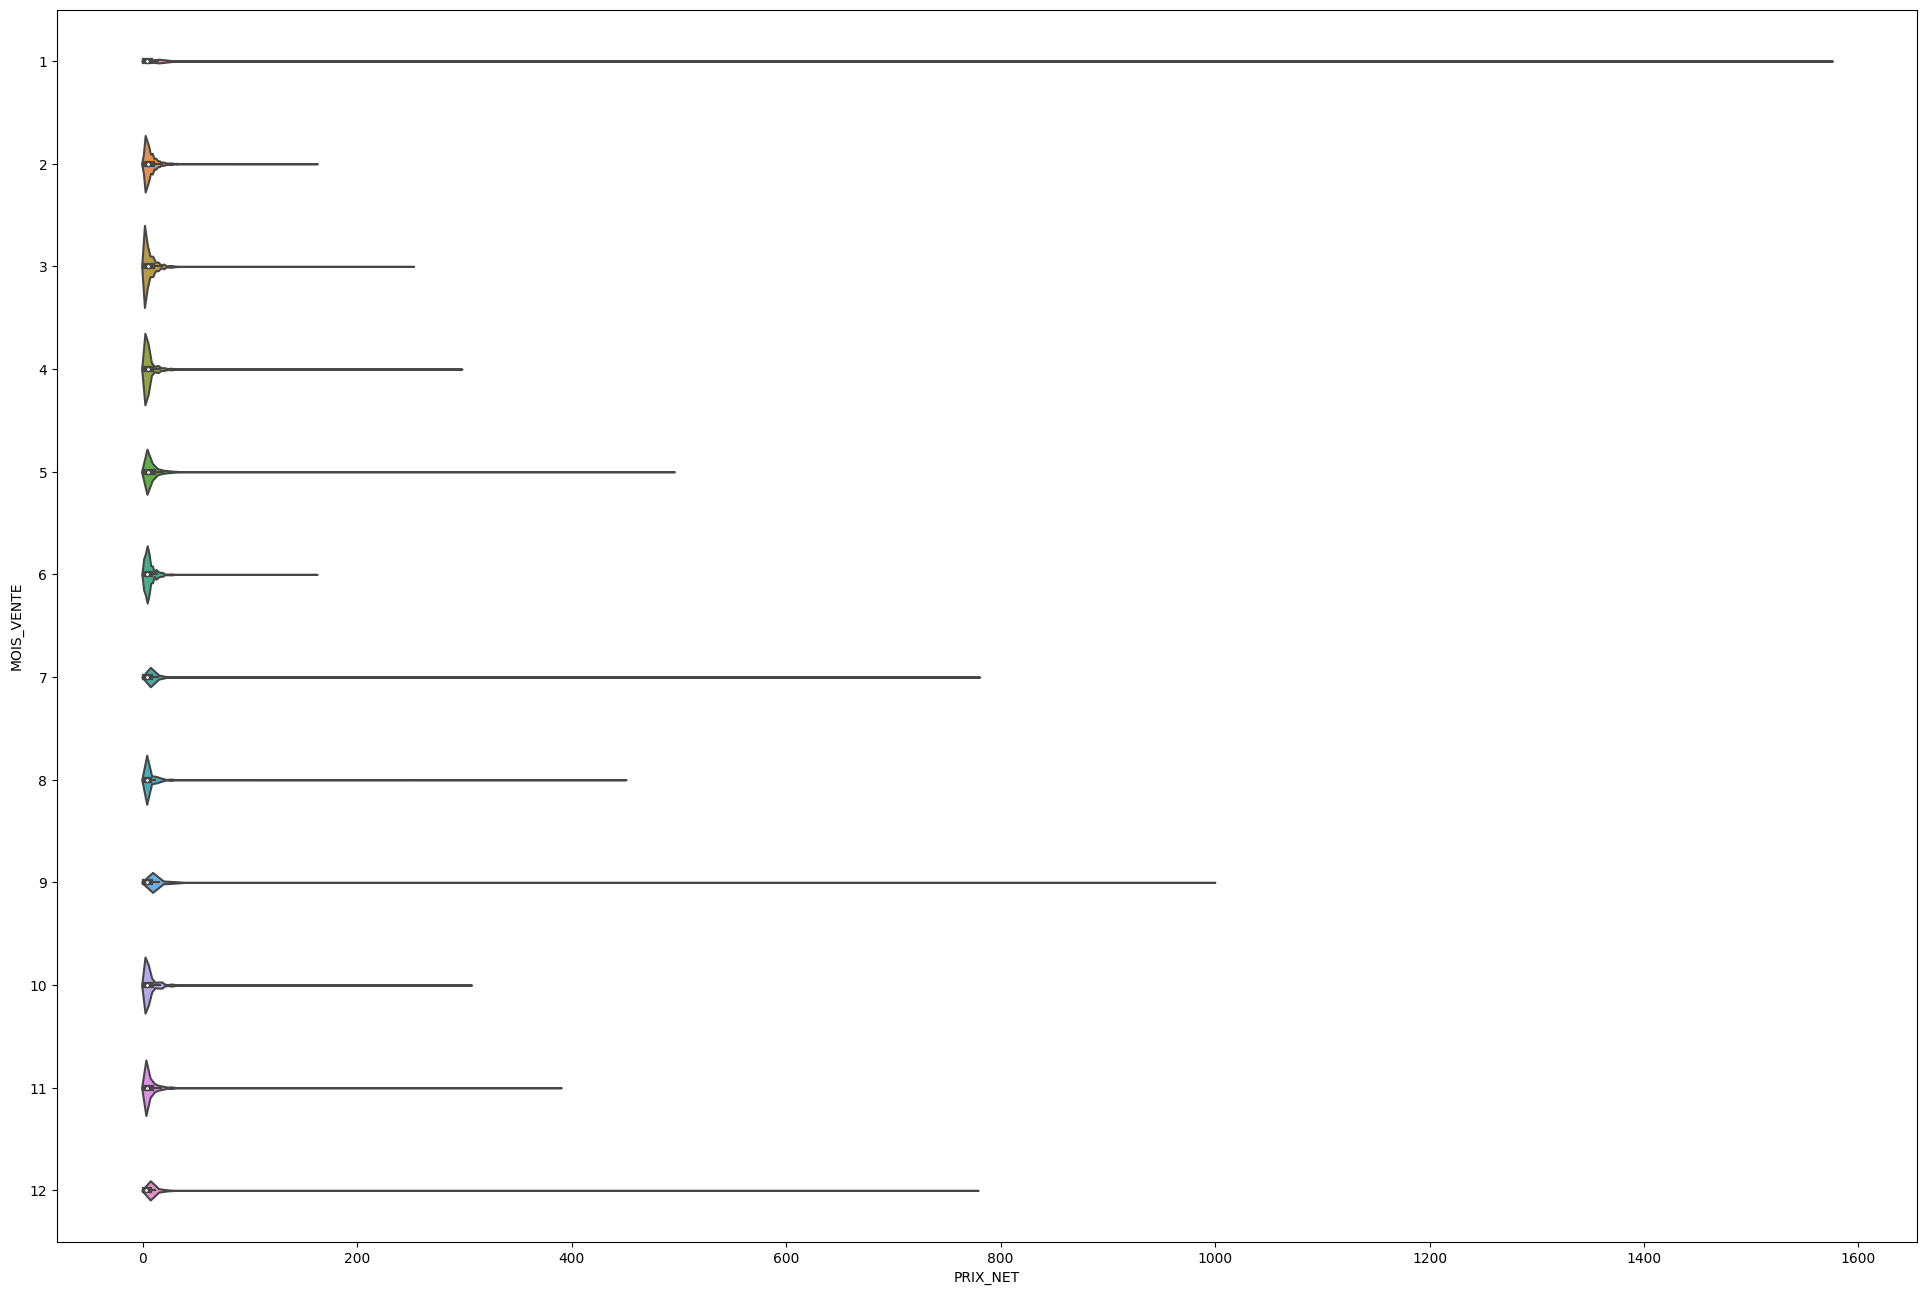

In [3]:
fig, ax = plt.subplots(figsize=(24,16))
sns.violinplot(data=data, x="PRIX_NET", y="MOIS_VENTE", ax=ax, orient="h")

<AxesSubplot:xlabel='PRIX_NET', ylabel='MOIS_VENTE'>

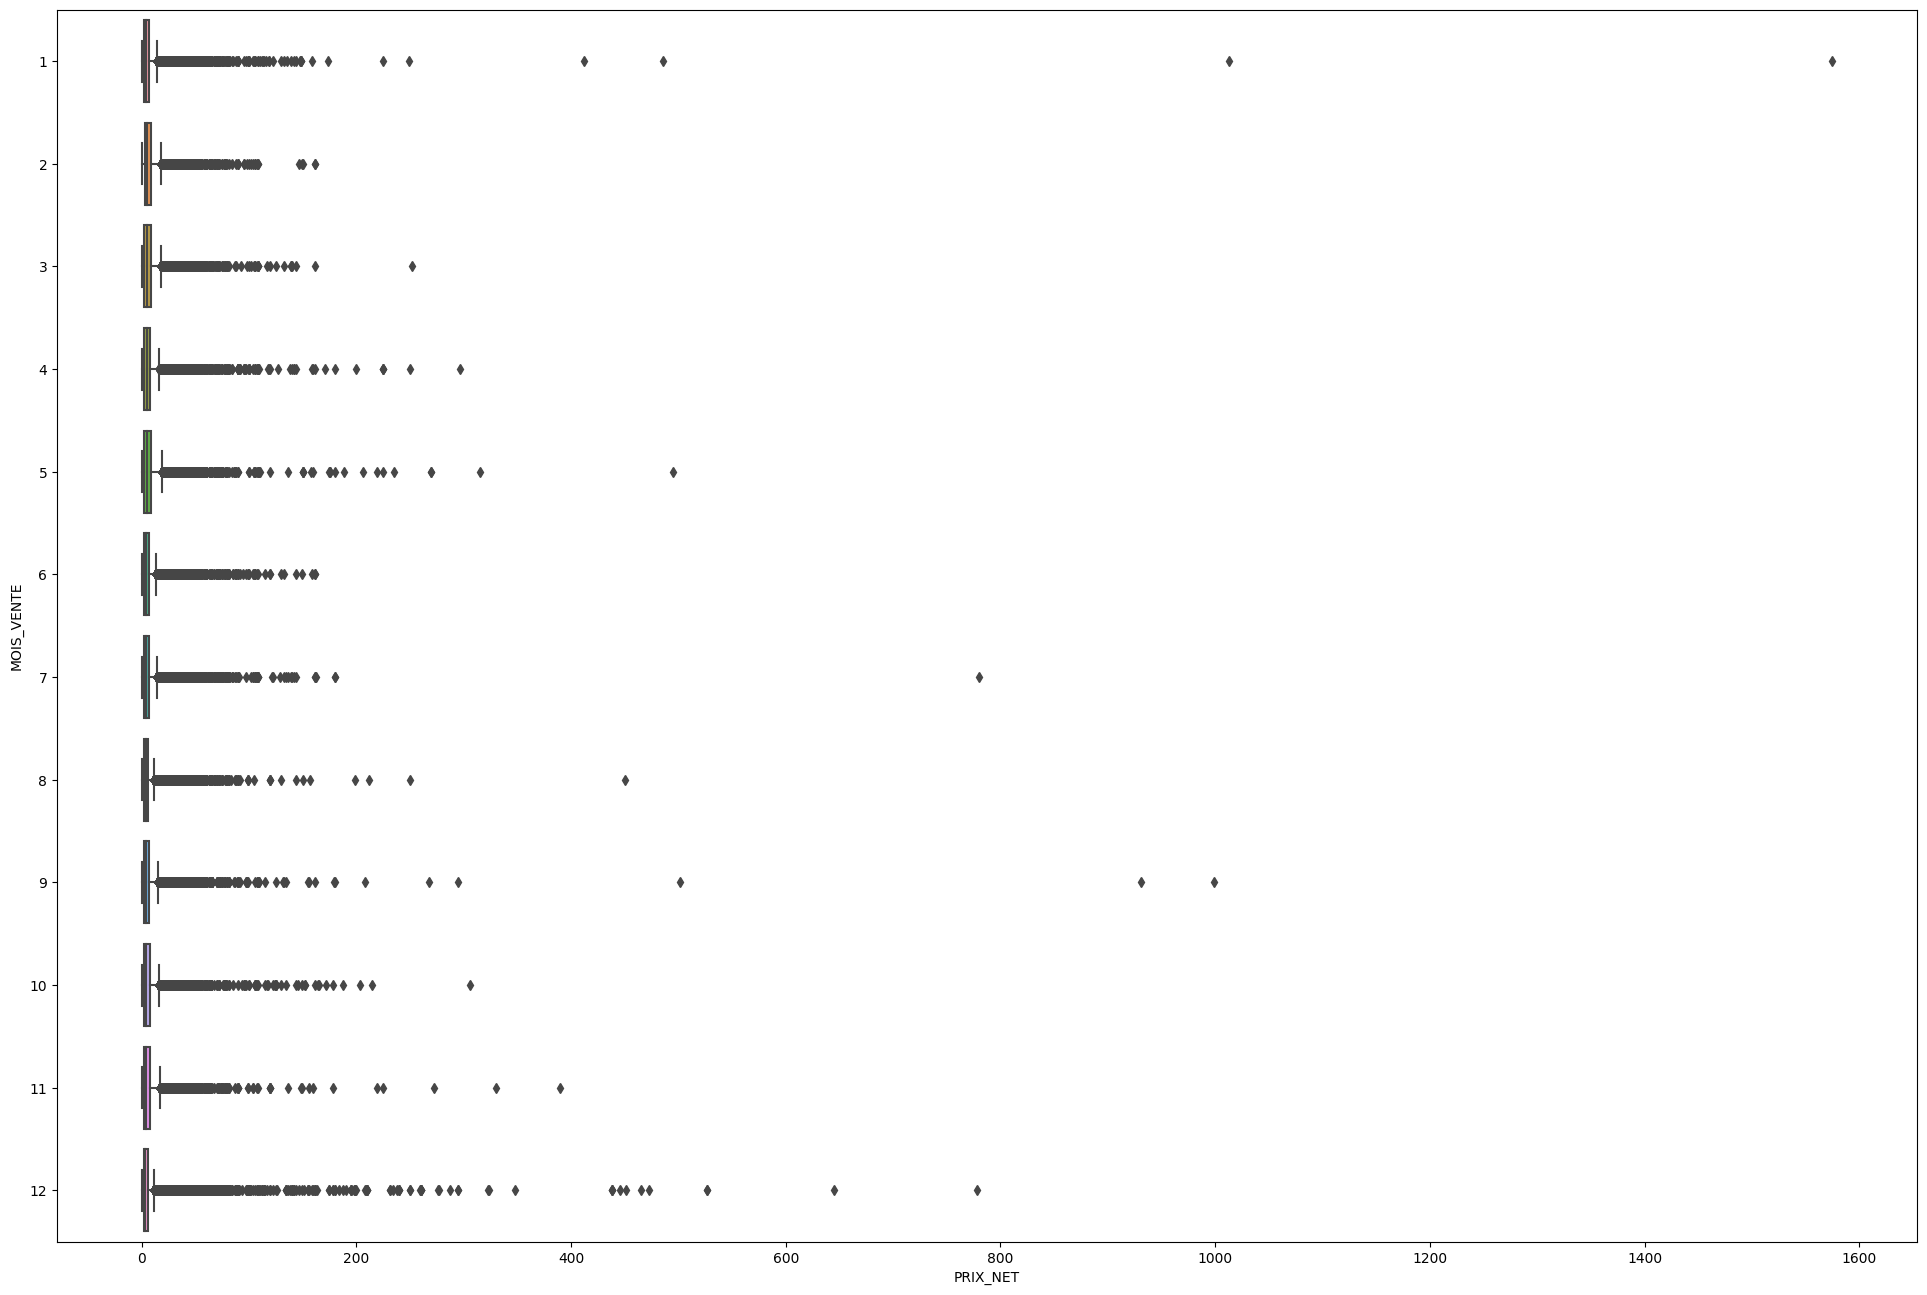

In [4]:
fig, ax = plt.subplots(figsize=(24,16))
sns.boxplot(data=data, x="PRIX_NET", y="MOIS_VENTE", ax=ax, orient="h")

<AxesSubplot:xlabel='PRIX_NET'>

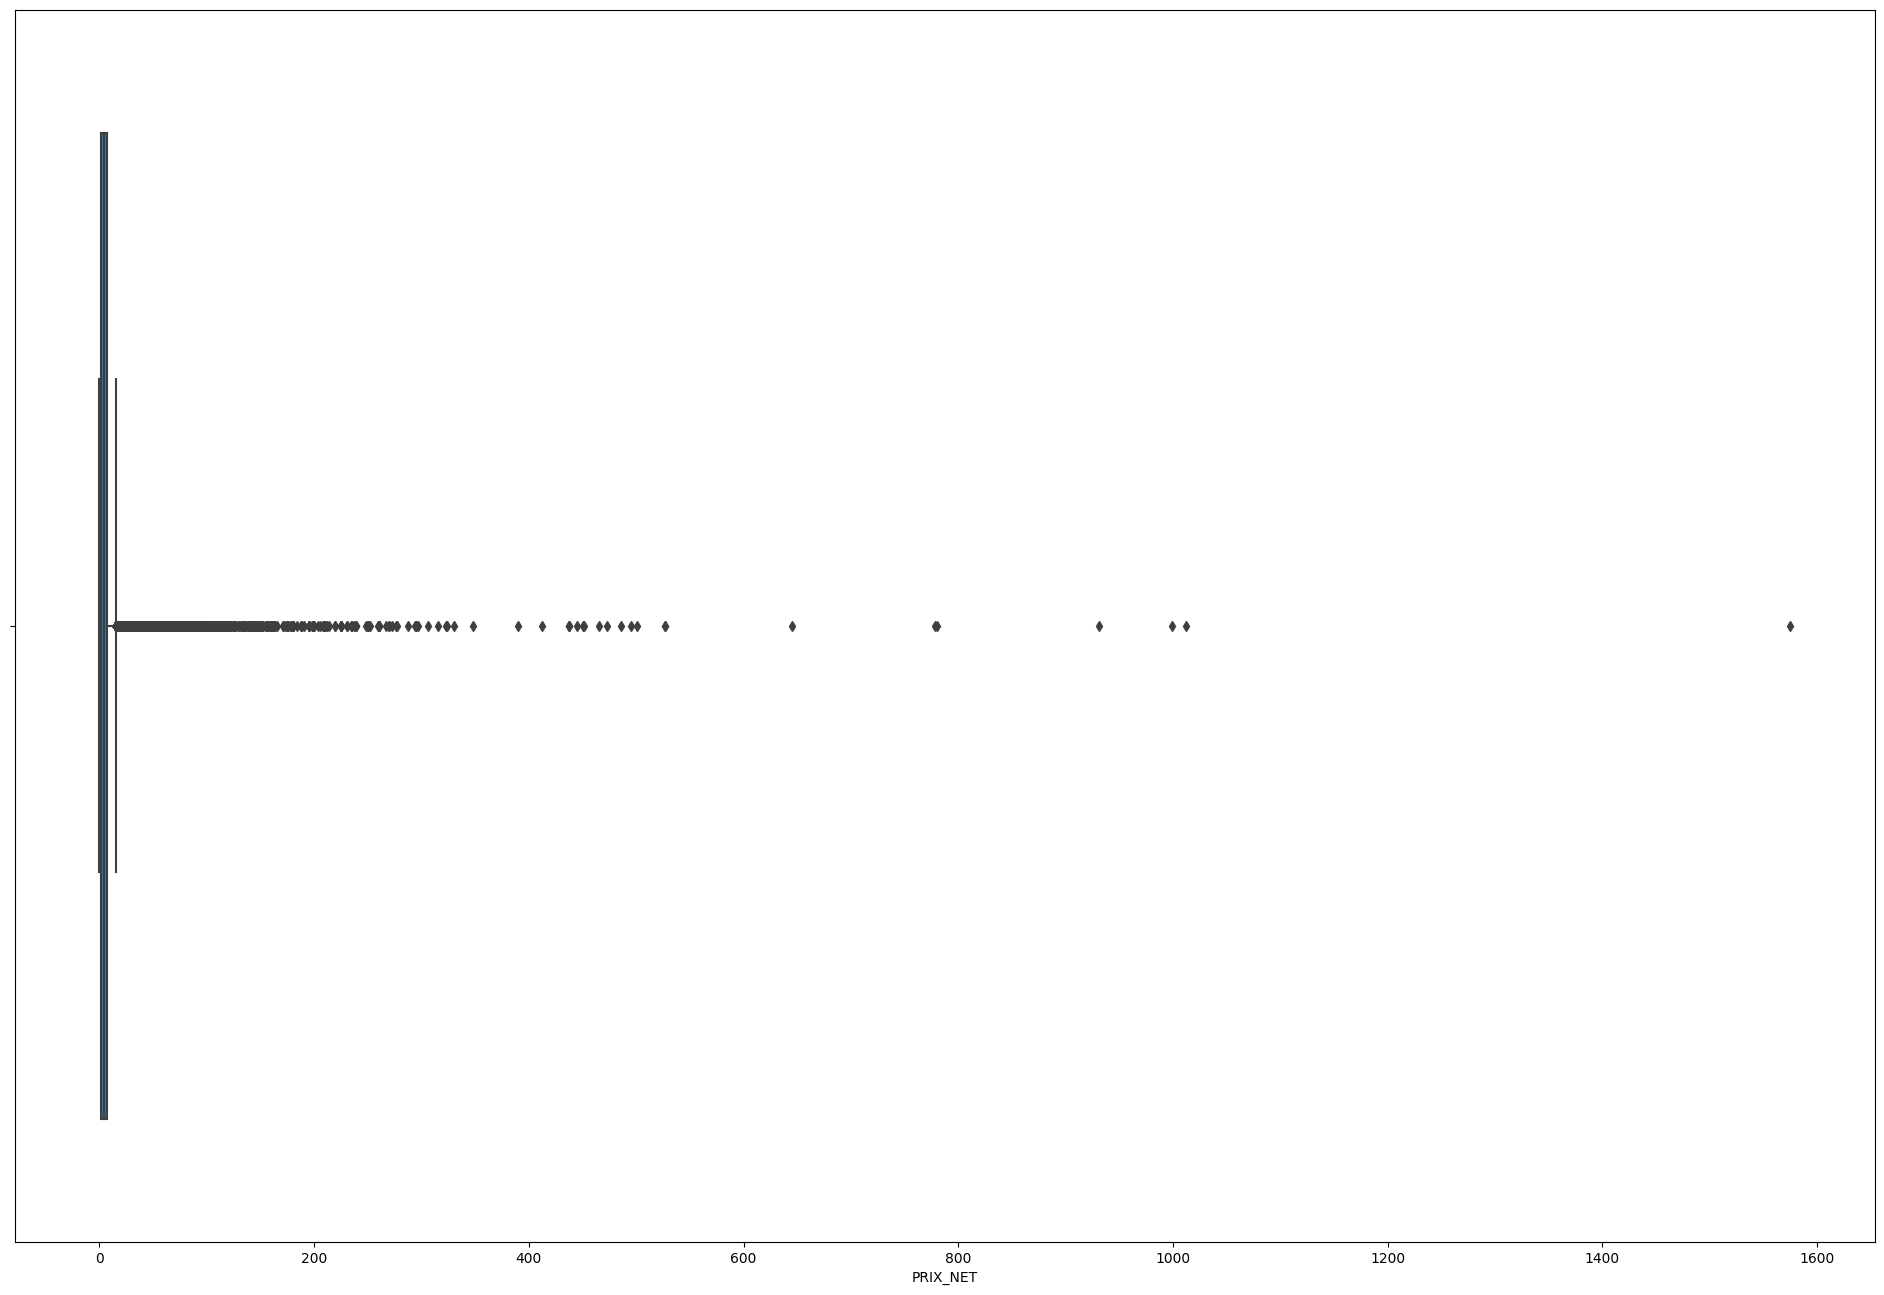

In [5]:
fig, ax = plt.subplots(figsize=(24,16))
sns.boxplot(data=data, x="PRIX_NET", ax=ax, orient="h")

In [6]:
for f in data['FAMILLE'].unique():
    print(f"{f}: {data[data['FAMILLE'] == f]['LIBELLE'].size} produits vendus")

HYGIENE: 2095077 produits vendus
SOINS DU VISAGE: 1494034 produits vendus
PARFUMAGE: 628087 produits vendus
SOINS DU CORPS: 878923 produits vendus
MAQUILLAGE: 1694751 produits vendus
CAPILLAIRES: 301365 produits vendus
SOLAIRES: 153254 produits vendus
MULTI FAMILLES: 30 produits vendus
SANTE NATURELLE: 1 produits vendus


<AxesSubplot:xlabel='FAMILLE', ylabel='Count'>

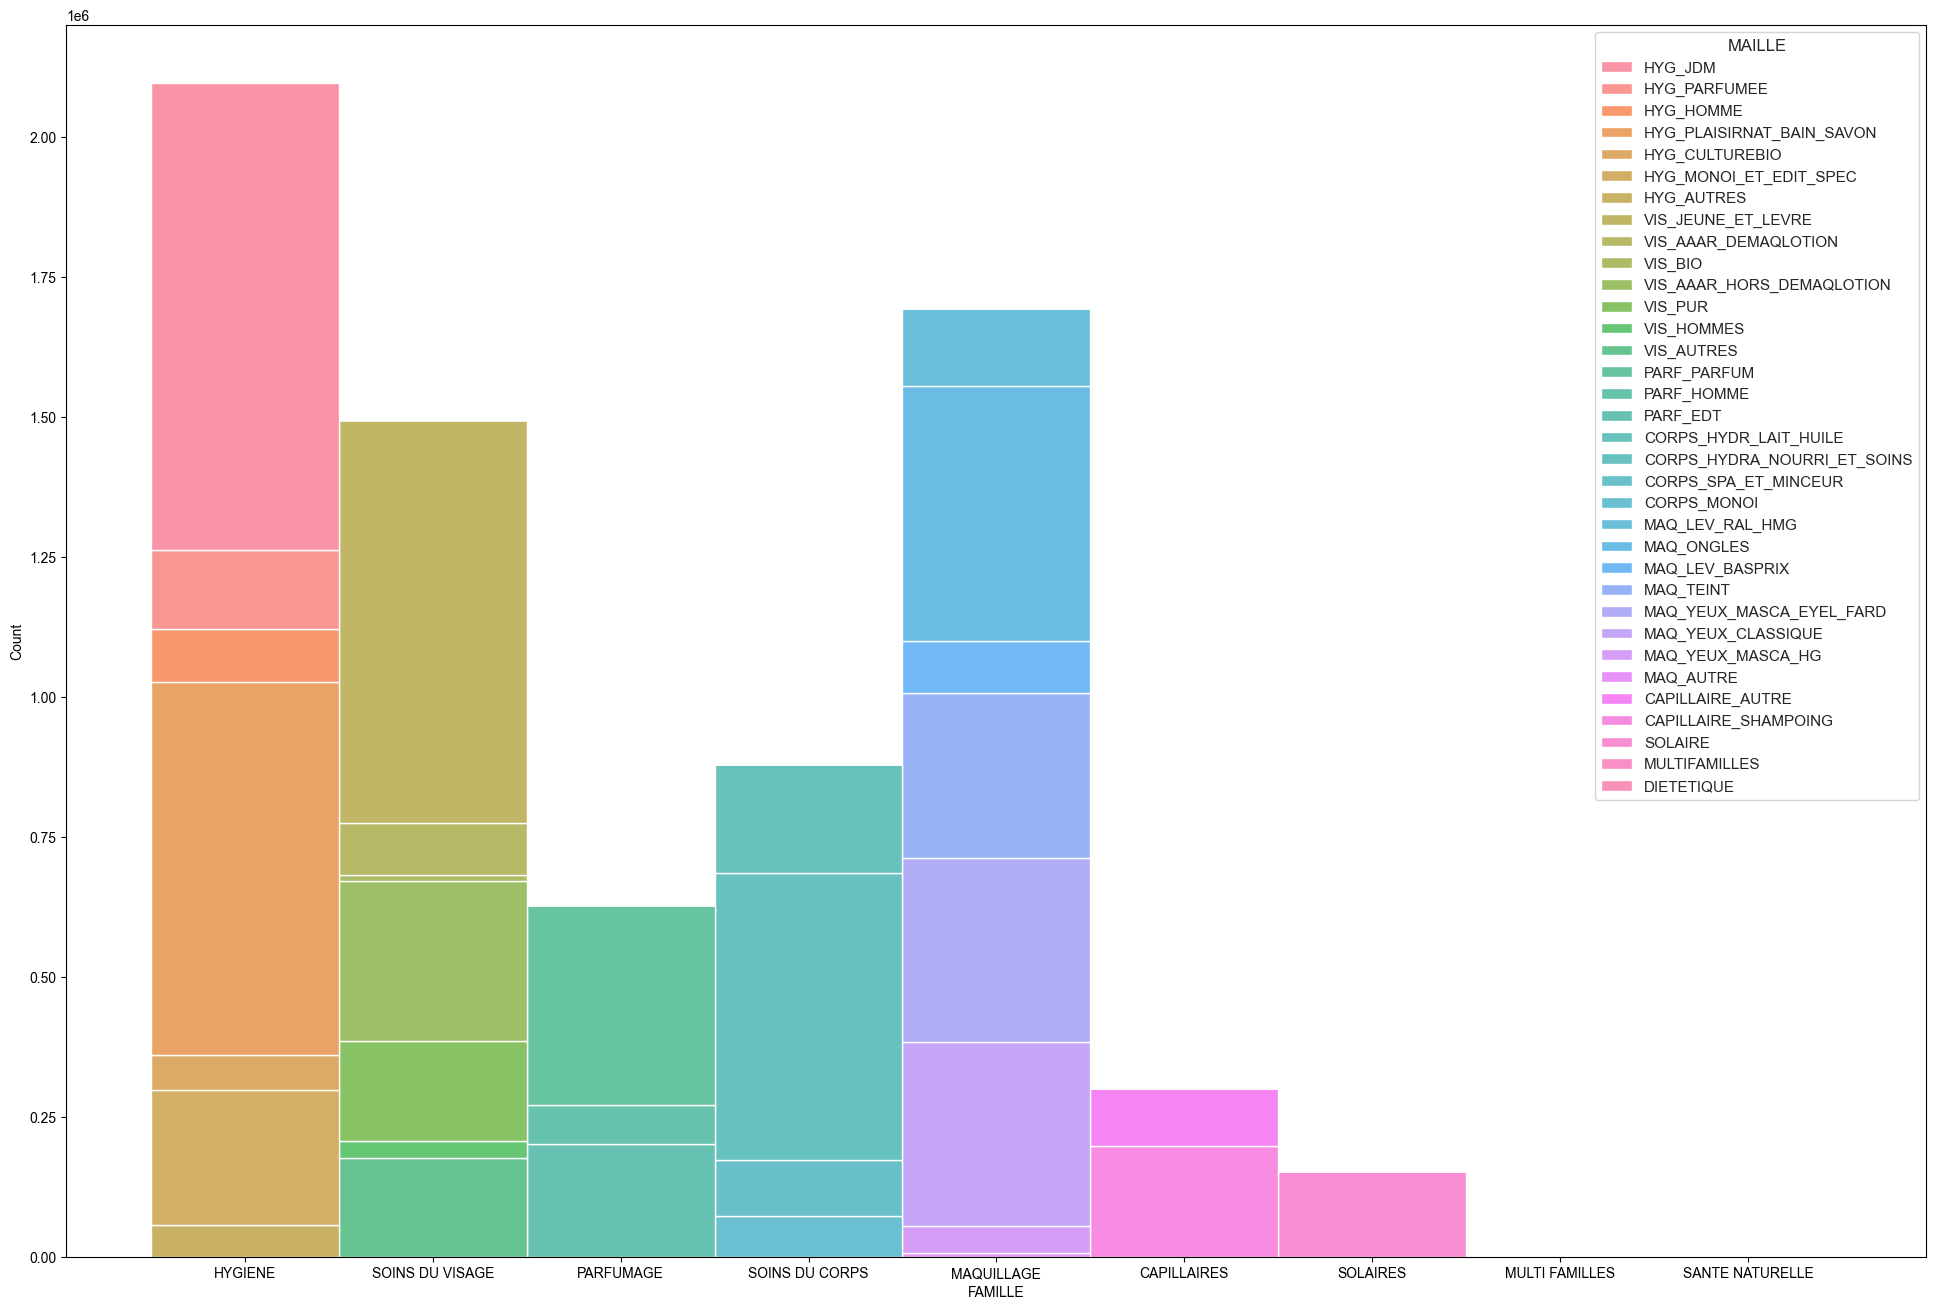

In [7]:
maille_per_family = [data[data['FAMILLE'] == f]['MAILLE'].unique() for f in data['FAMILLE'].unique()]
hue_order = np.concatenate(maille_per_family).ravel()
fig, ax = plt.subplots(figsize=(24,16))
sns.set_theme(style="whitegrid")
sns.histplot(data=data, x='FAMILLE', hue='MAILLE', multiple="stack", hue_order=hue_order)



<AxesSubplot:xlabel='MAILLE', ylabel='Count'>

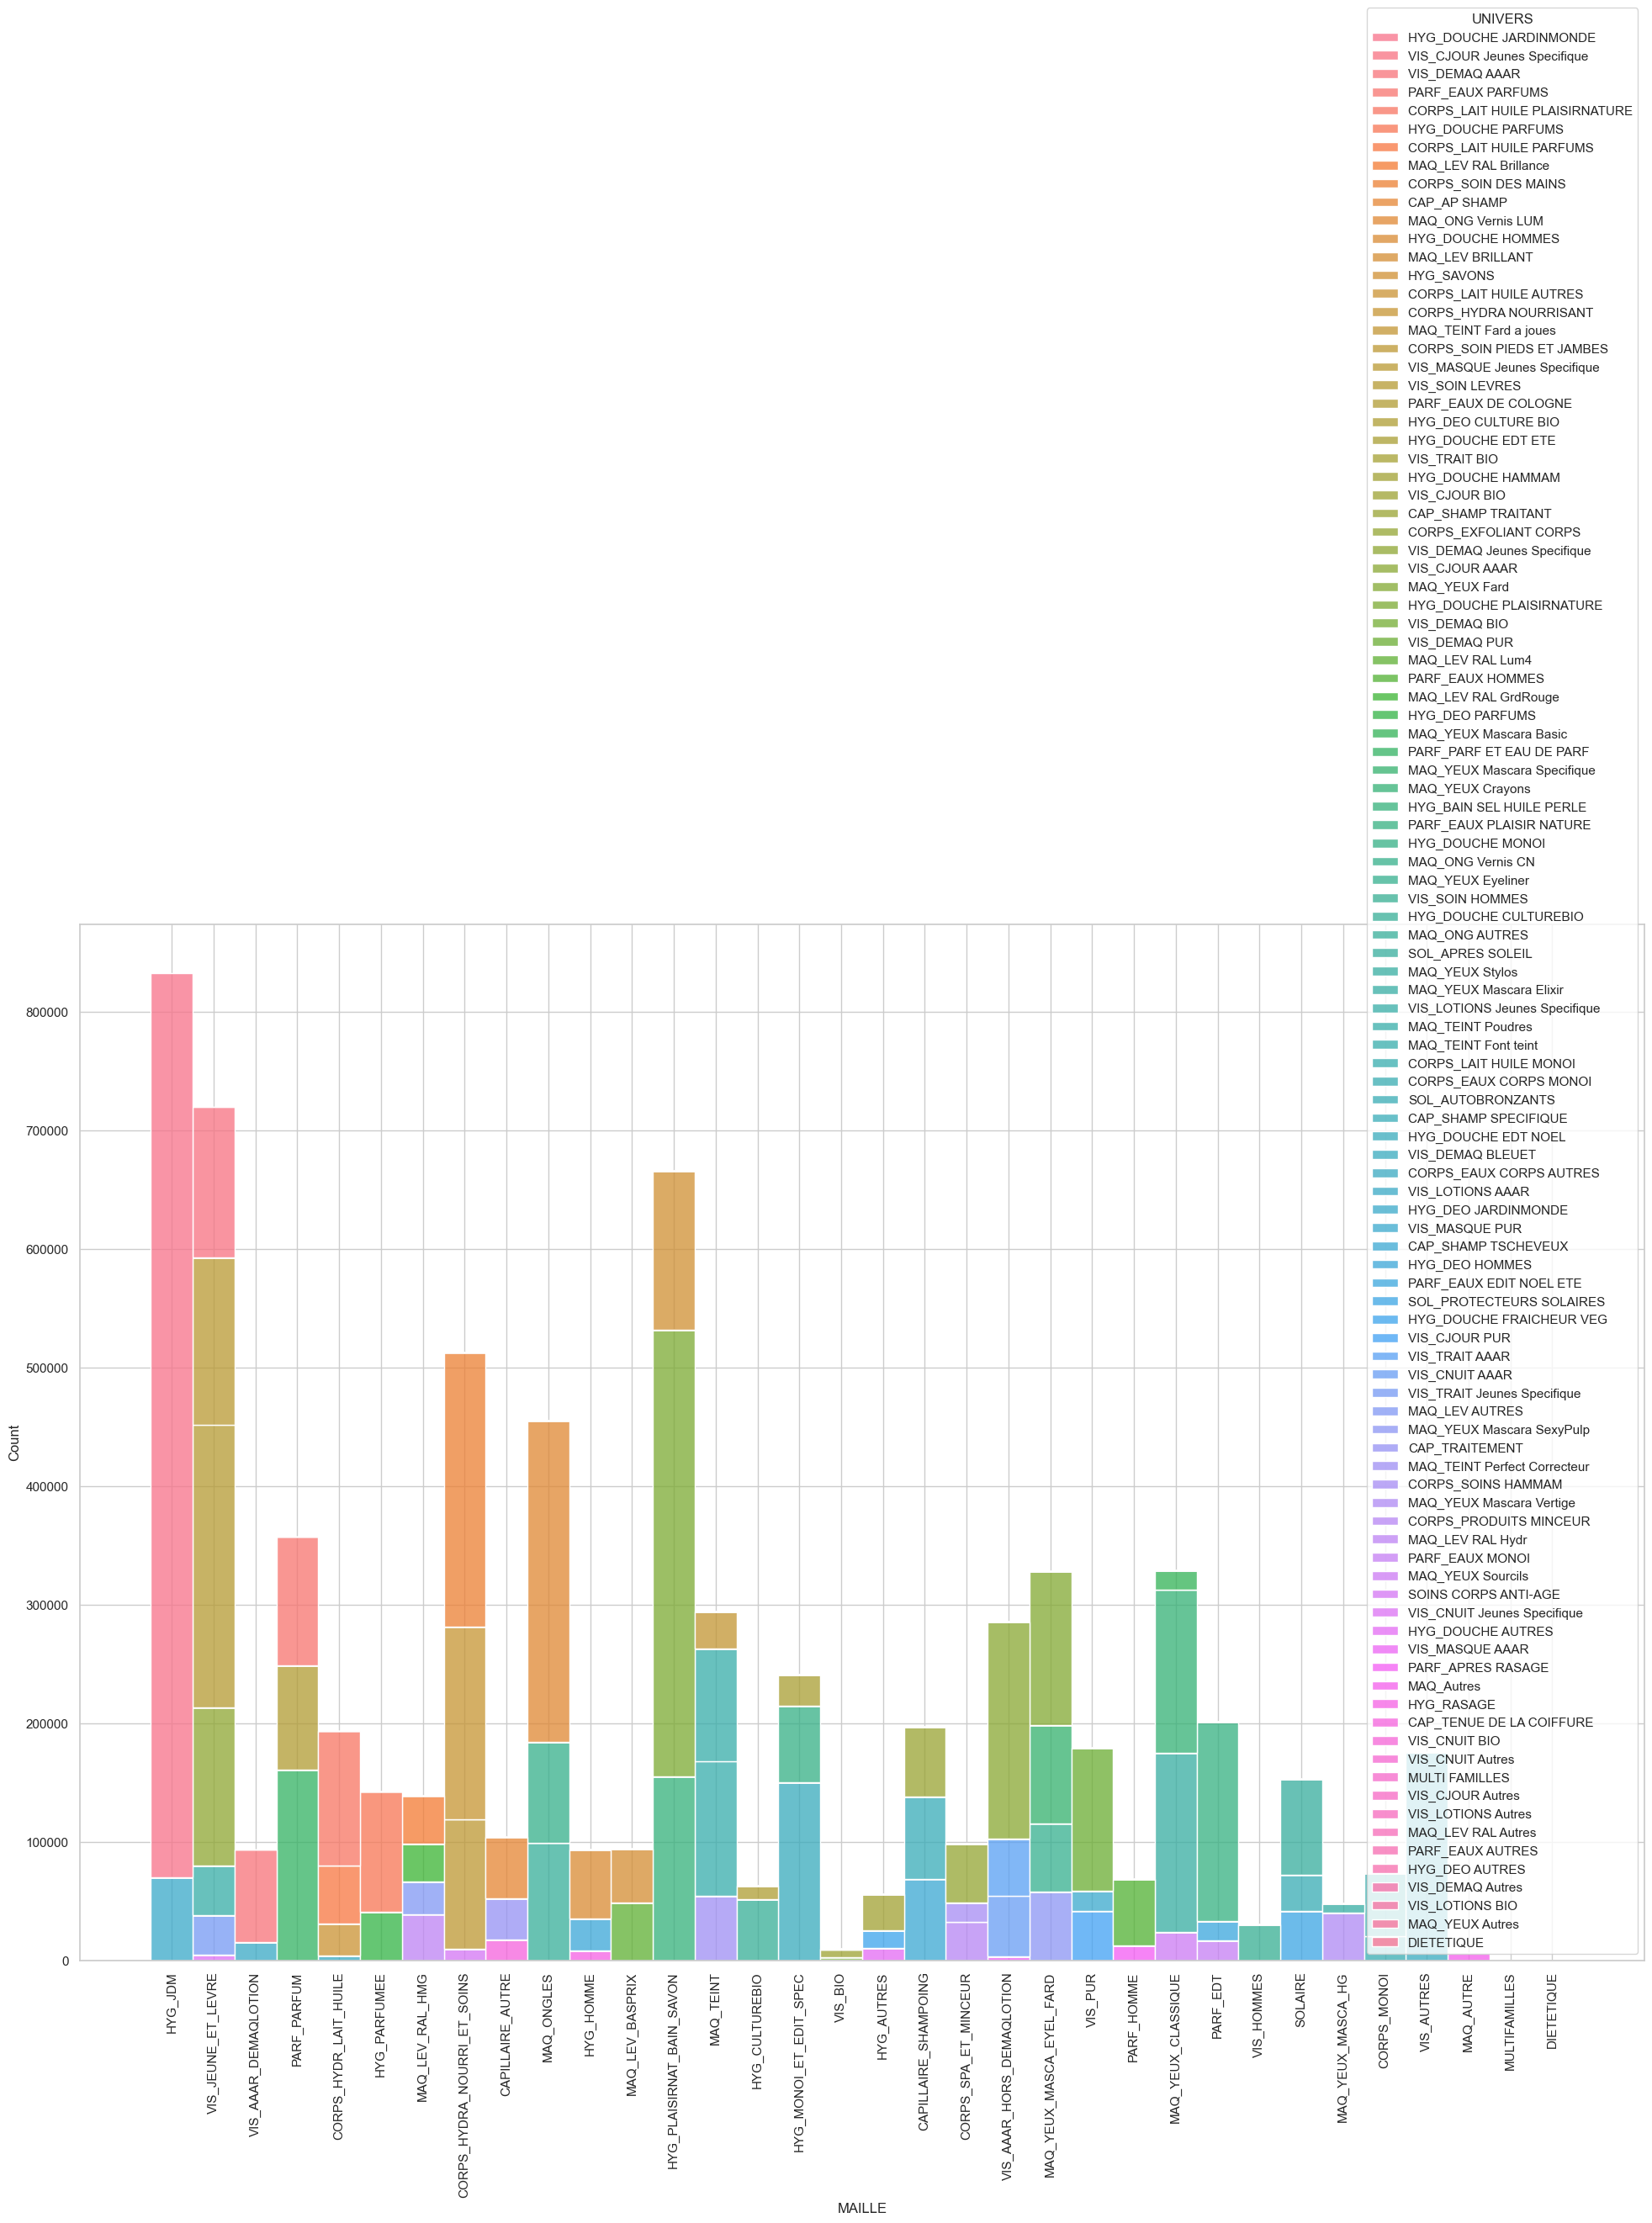

In [8]:
fig, ax = plt.subplots(figsize=(24,16))
plt.xticks(rotation='vertical')
sns.set_theme(style="whitegrid")
sns.histplot(data=data, x='MAILLE', hue='UNIVERS', multiple="stack", cbar=True)

## Outlier Detection and treatment method

Pas de valeur manquante dans le dataset donc pas besoin de gérer cela.

### Localisation des valeurs aberrantes:
- Les valeurs aberrantes sont cherchées en mettant en relation prix et mois.
- On recherche les valeurs aberrantes uniquement dans les prix.
- Choix d'une méthode de détection selon la distance inter-quartile, appliqué séparément par mois, puis couplé par la prise en compte des quartiles min et max des mois.

Utilisation de la méthode IQR (Inter-Quartile Range) avec 1.7

### Traitement des valeurs aberrantes identifiées:
- Démarche Active
>- Remplacement par valeurs de substitution
>- Suppression
- Démarche Passive
> Acceptation : minimisation de leur influence dans notre algorithme 

Dans notre cas remplacement le plus approprié -> pas de perte de data, et moins de complexité par la suite.
Remplacement par la moyenne des valeurs médiane?

In [10]:
model = IsolationForest(contamination=0.01)
outliers_idx = model.fit_predict(data['PRIX_NET'].to_numpy().reshape(-1, 1))

In [11]:
data[outliers_idx == -1].index

Int64Index([    311,     458,     479,     658,     949,    1409,    1496,
               1505,    1519,    1569,
            ...
            7245023, 7245042, 7245094, 7245253, 7245286, 7245302, 7245304,
            7245305, 7245308, 7245409],
           dtype='int64', length=68946)